# Analysis effect of Loan  Characteristics on BorrowerAPR
### by Daniel Lee

## Investigation Overview
In this investigation, I wanted to look at loan features that could be used to predict their borrower APR. The main focus was on the original loan amount, borrower's Prosper rating, EmploymentStatus, borrower's stated monthly income.

## Dataset Overview
The dataset consisted of borrower APRs and attributes of 113,937 loans. The attributes included original loan amount, borrower's Prosper rating, employment status, borrower's stated monthly income, as well as many other features such as  debt to income ratio, current loan status etc.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
#gather dataset
df = pd.read_csv('prosperLoanData.csv')
df.head(5)

#define interested features in dataset
features = ['ProsperRating (Alpha)','BorrowerAPR','EmploymentStatus', 
            'IsBorrowerHomeowner','StatedMonthlyIncome','LoanOriginalAmount',
            'DebtToIncomeRatio','CurrentCreditLines','IncomeVerifiable']
loan = df[features] 

# Define EmploymentStatus as a category
rate_order = ['HR','E','D','C','B','A','AA']
ordered_loan = pd.api.types.CategoricalDtype(ordered = True, categories = rate_order)
loan.loc[:,'ProsperRating (Alpha)'] = loan['ProsperRating (Alpha)'].astype(ordered_loan, inplace=True)

#Fill nan value in EmploymentStatus with Other
loan['EmploymentStatus'].fillna(value = 'Other', inplace=True)
loan['EmploymentStatus'].unique()

# Define EmploymentStatus as a category
employment_status_dict = ['Other', 'Not employed','Retired','Self-employed', 'Part-time', 'Full-time', 'Employed']
ordered_employment_status = pd.api.types.CategoricalDtype(ordered = True, categories = employment_status_dict)
loan.loc[:,'EmploymentStatus'] = loan['EmploymentStatus'].astype(ordered_employment_status, inplace=True)

#fill nan value in BorrowerAPR with 0
loan['BorrowerAPR'].fillna(value=0, inplace=True)

#fill nan value in DebtToIncomeRatio with 0
loan['DebtToIncomeRatio'].fillna(value = 0, inplace=True)

#fill nan value in CurrentCreditLines with 0
loan['CurrentCreditLines'].fillna(value = 0, inplace=True)

## Distribution of Borrower APR
The distribution of BorrowerAPR looks like multimodal. There are three main peaks that we can notice:
- below 0.1
- around 0.2
- around 0.3 

Furthermore, there is a sharp peak between 0.35 and 0.36.

Text(0.5, 0, 'BorrowerAPR')

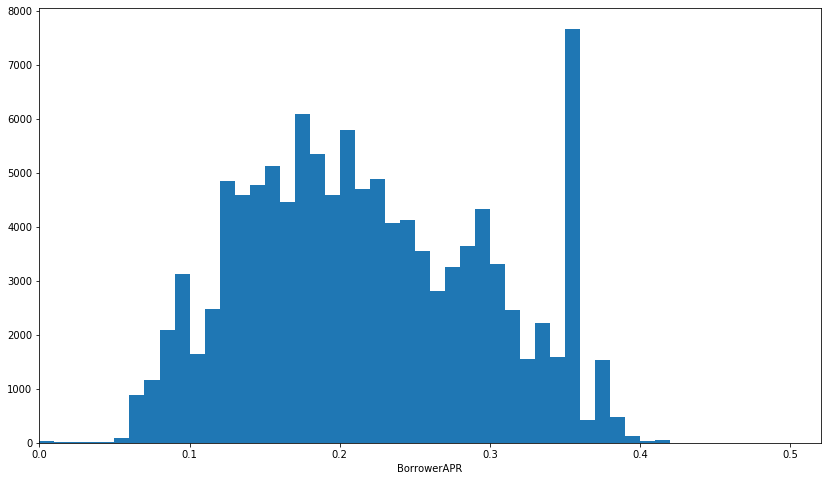

In [4]:
plt.figure(figsize=(14,8))
bins = np.arange(0, max(loan['BorrowerAPR'])+0.1, 0.01)
plt.hist(data = loan, x='BorrowerAPR', bins=bins)
plt.xlim(0,0.52)
plt.xlabel('BorrowerAPR')

## Distribution of StatedMonthlyIncome

Text(0.5, 0, 'Montly income')

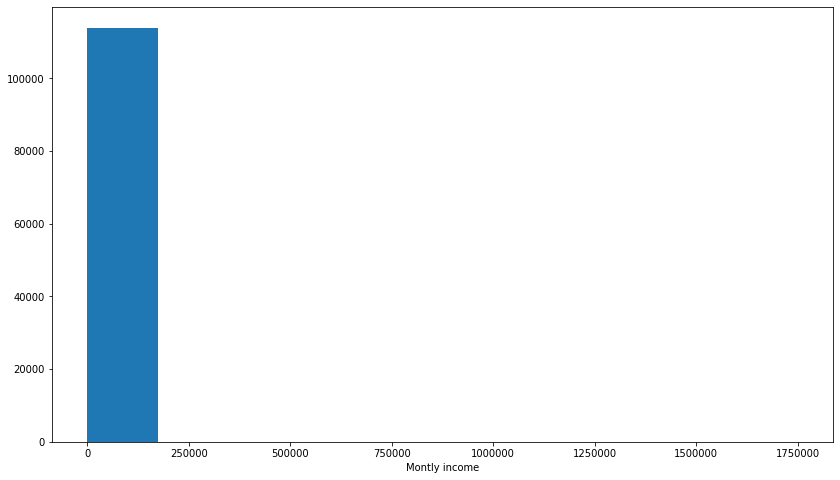

In [6]:
plt.figure(figsize=(14,8))
plt.hist(data = loan, x = 'StatedMonthlyIncome')
plt.xlabel('Montly income')

From distribution above, it can be clearly see that there are outliers in this feature. We'll remove outliers and draw the graph again to get more insight data

Text(0.5, 0, 'Monthly Income')

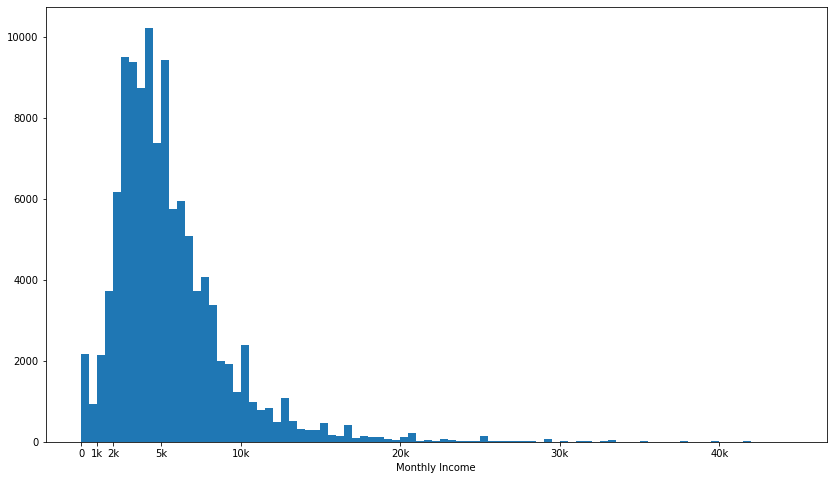

In [8]:
# we will remove those with monthly income above 50k 
loan_outliers = loan[loan['StatedMonthlyIncome']<45000]
loan_outliers.reset_index(drop=True, inplace=True)
loan_outliers.shape

#draw graph again
plt.figure(figsize=(14,8))
bins = np.arange(0, loan_outliers['StatedMonthlyIncome'].max()+100, 500)
plt.hist(data = loan_outliers , x ='StatedMonthlyIncome', bins = bins)
plt.xticks([0, 1e3, 2e3, 5e3, 1e4, 2e4, 3e4, 4e4], [0, '1k', '2k', '5k', '10k', '20k', '30k', '40k'])
plt.xlabel('Monthly Income')

StatedMonthlyIncome is unimodal with one peak around 5k. The distribution is right skewed. Most of people have monthly income less than 20k.

## Distribution of LoanOriginalAmount

The distribution of loan original amount is multimodal that people often make loans with amount of 5000, 10000 and 15000. People who have higher montly income often have small loan

Text(0.5, 0, 'Loan Original Amount')

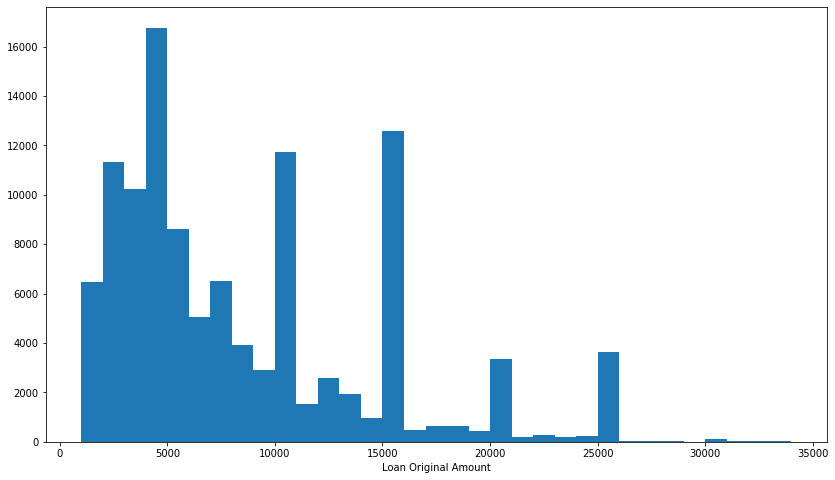

In [9]:
plt.figure(figsize=(14,8))
bins = np.arange(1000,35000, 1000)
plt.hist(data = loan, x = 'LoanOriginalAmount', bins=bins)
plt.xlabel('Loan Original Amount')

## Distribution of DebtToIncomeRatio

Text(0.5, 0, 'Debt to income ratio')

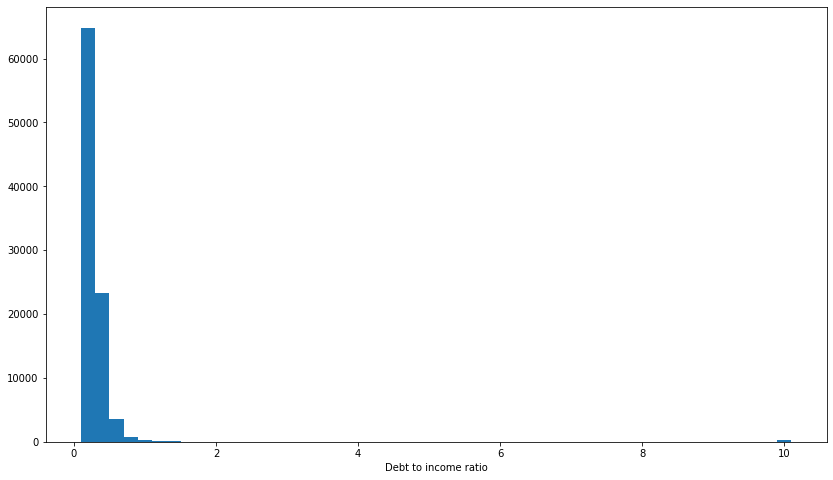

In [10]:
plt.figure(figsize=(14,8))
bins = np.arange(0.1, loan['DebtToIncomeRatio'].max()+0.1, 0.2)
plt.hist(data = loan, x='DebtToIncomeRatio', bins = bins)
plt.xlabel('Debt to income ratio')

We can see that the distribution is highly right skewed which means it contains outliers. We are going to divide this variable into two graph: one with debtincome (ratio is greater than 1) 
Now we are going to look at those have debt less than income<br>
**Debt<Income**

Text(0.5, 0, 'Debt to Income ratio')

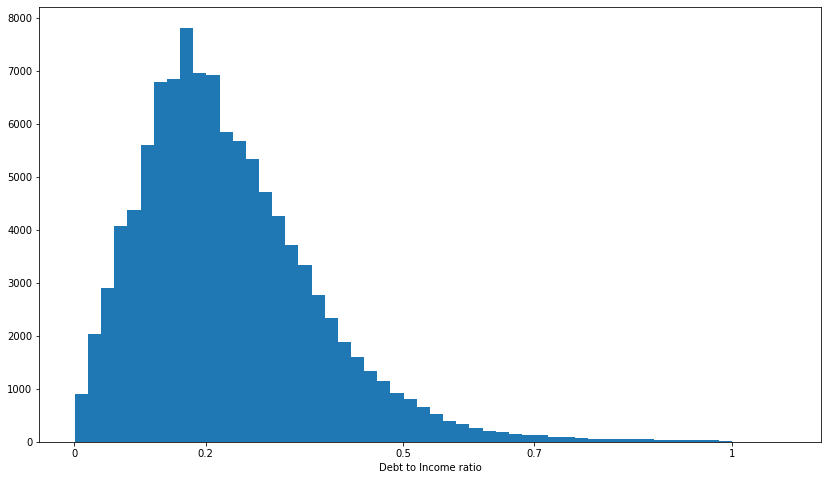

In [12]:
nb = loan[loan['DebtToIncomeRatio']>1].shape[0]
percent = round((nb/loan.shape[0]),3)*100
loan_ratio = loan[loan['DebtToIncomeRatio']<1].reset_index(drop=True)

plt.figure(figsize=(14,8))
bins = np.arange(0.001, loan_ratio['DebtToIncomeRatio'].max()+0.1, 0.02)
plt.hist(data = loan_ratio, x='DebtToIncomeRatio', bins=bins)
plt.xticks([0, 0.2, 0.5,0.7,1], [0, 0.2, 0.5, 0.7, 1])
plt.xlabel('Debt to Income ratio')

this is a unimodal distribution that the amount of debt less than income is around 0.2

Its interesting to see that people have debt greater than income<br>
**Debt>Income**

Text(0.5, 0, 'Debt to Income ratio')

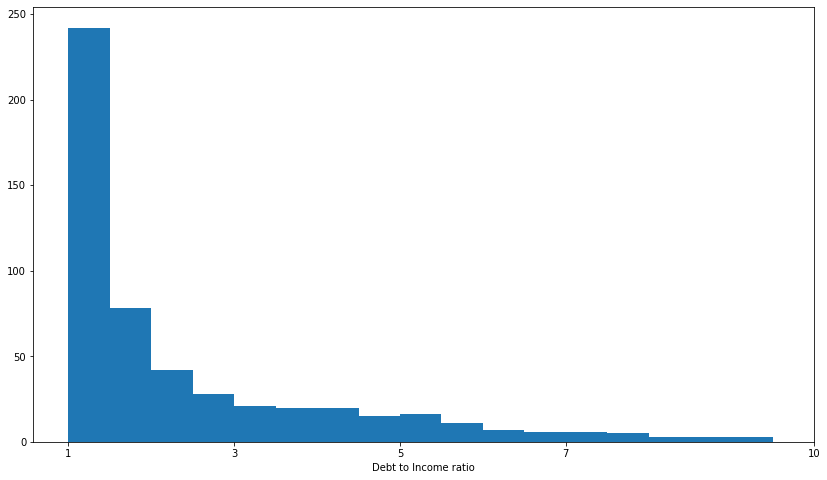

In [13]:
plt.figure(figsize=(14,8))
loan_debt = loan[loan['DebtToIncomeRatio']>1].reset_index(drop=True)
bins = np.arange(1, 10, 0.5)
plt.hist(data = loan_debt, x='DebtToIncomeRatio', bins=bins)
plt.xticks([1, 3, 5, 7, 10],[1, 3, 5, 7, 10] )
plt.xlabel('Debt to Income ratio')

### Borrower APR vs LoanOriginalAmount

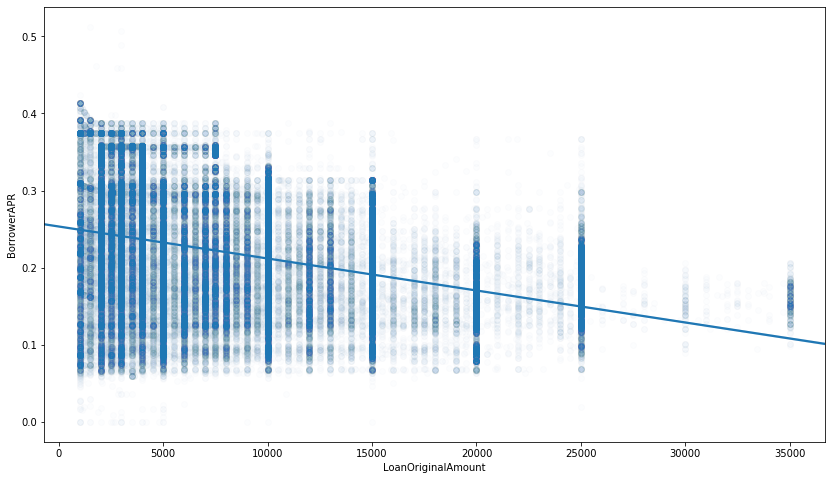

In [14]:
plt.figure(figsize= (14,8))
sb.regplot(data = loan, x='LoanOriginalAmount', y='BorrowerAPR', scatter_kws={'alpha':0.01})

The plot shows that borrowerAPR have a negative correlation with LoanOriginalAmount

## Borrower APR vs. Prosper Rating

The borrower APR decreases with the increasingly better rating. Borrowers with the best Prosper ratings have the lowest APR. It means that the Prosper rating has a strong effect on borrower APR.

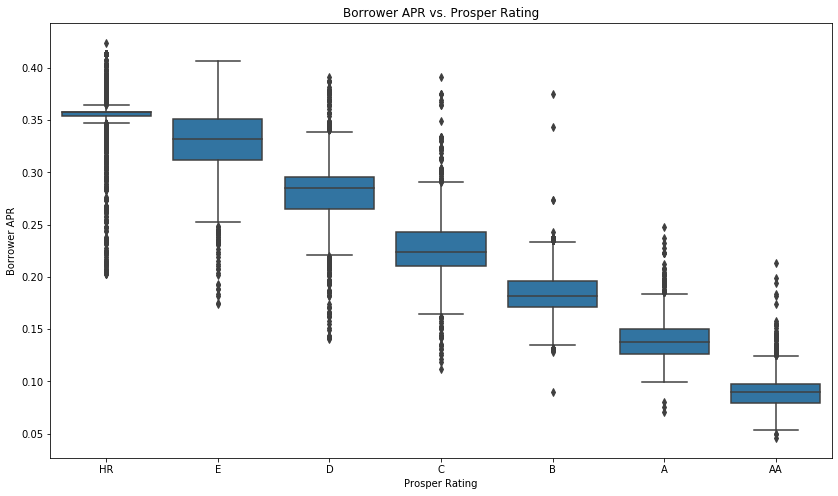

In [18]:
loan_sub = loan.query("StatedMonthlyIncome <40000")
plt.figure(figsize=[14,8])
default_color = sb.color_palette()[0]
sb.boxplot(data=loan_sub, x='ProsperRating (Alpha)', y='BorrowerAPR', color=default_color)
plt.xlabel('Prosper Rating')
plt.ylabel('Borrower APR')
plt.title('Borrower APR vs. Prosper Rating');

## Prosper Rating Effect on Relationship between APR and Loan Amount

The loan amount increases with better rating. The borrower APR decreases with better rating. Interestingly, the relationship between borrower APR and loan amount turns from negative to slightly positive when the Prosper ratings are increased from HR to A or better. This may because people with A or AA ratings tend to borrow more money, increasting APR could prevent them borrow even more and maximize the profit. But people with lower ratings tend to borrow less money, decreasing APR could encourage them to borrow more.

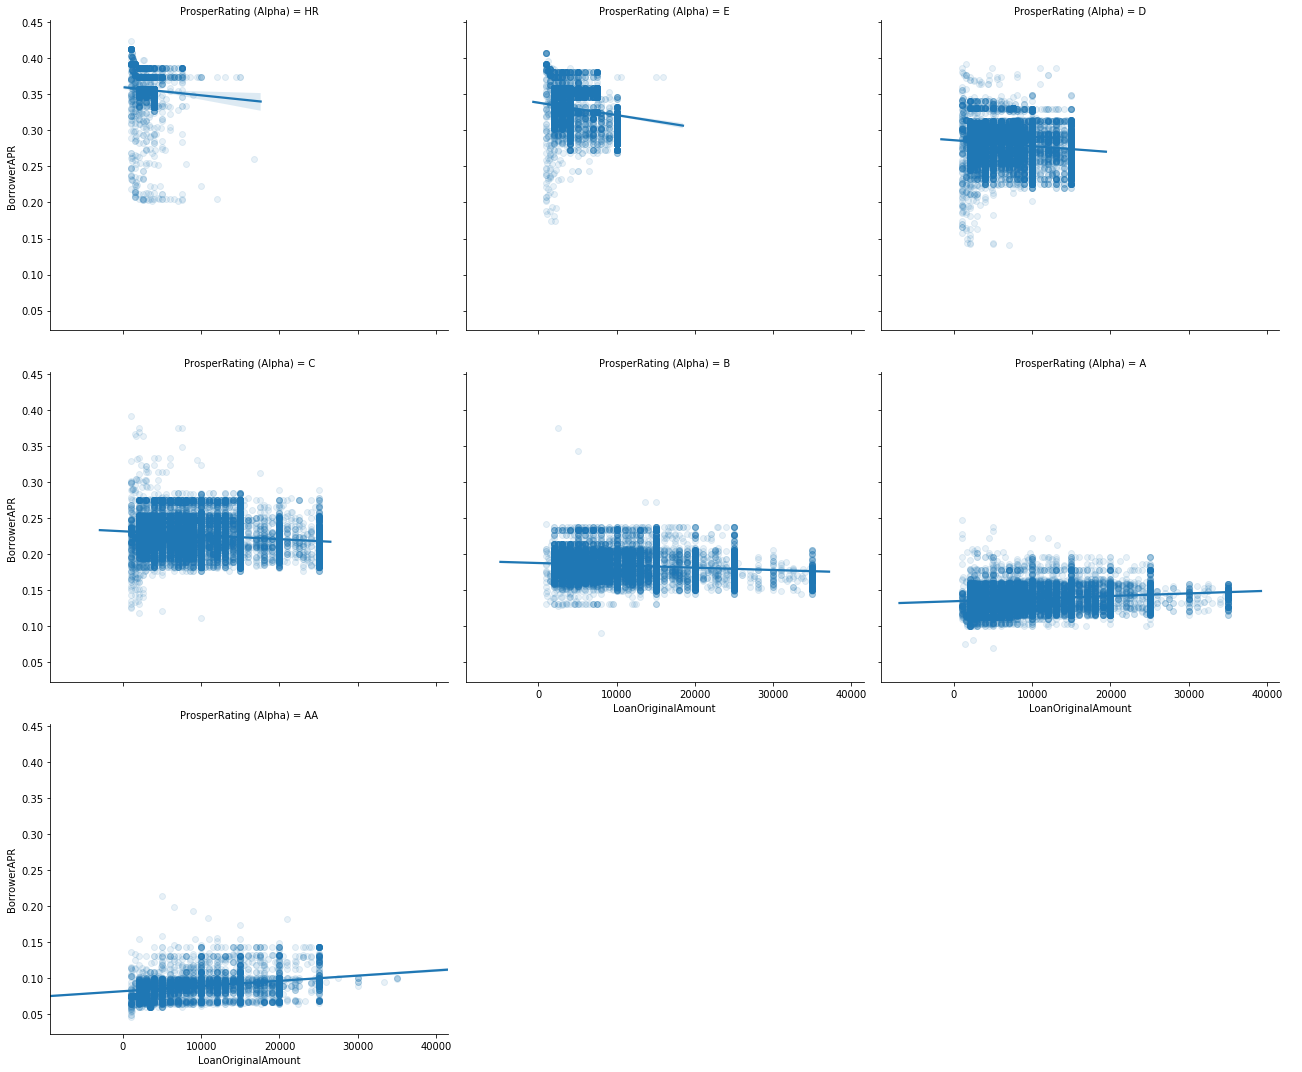

In [19]:
# Prosper rating effect on relationship of APR and loan amount
g=sb.FacetGrid(data=loan_sub, aspect=1.2, height=5, col='ProsperRating (Alpha)', col_wrap=3)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend()

## EmploymentStatus effect on the relationship between StatedMonthlyIncome and ProsperRating (Alpha)

StatedMonthlyIncome is increased as proper rating alpha increase. This trend is correct for most of people regardless of status except for self-employed and Retired. Interestingly, the highest income in AA rating belong to Employed people while the highest income in range of HR to A rating belong to people have full-time jobs.

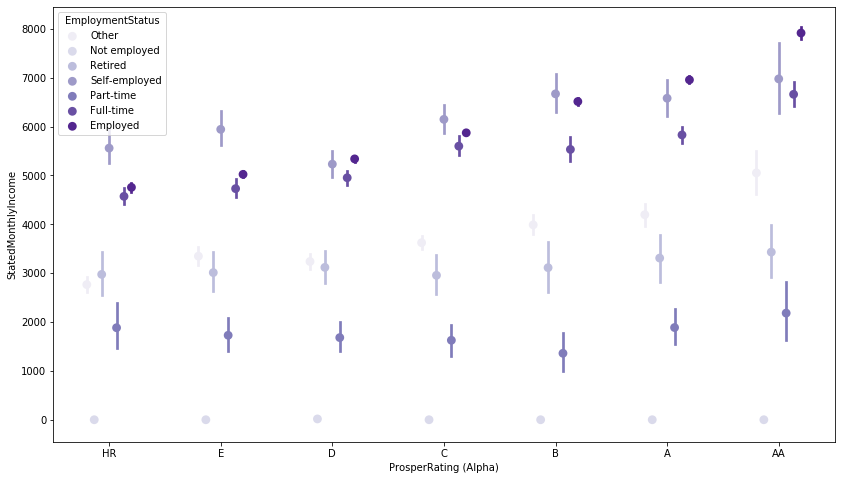

In [21]:
plt.figure(figsize=(14,8))
sb.pointplot(data = loan_sub, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'EmploymentStatus',
           palette = 'Purples', linestyles = '', dodge = 0.4)